In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

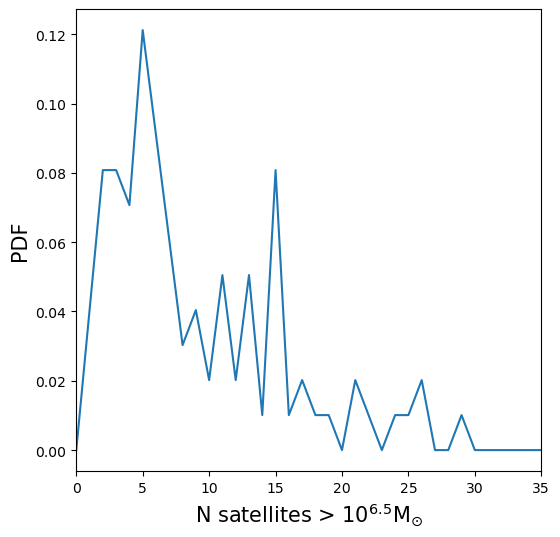

In [71]:
data = jsm_models.LOAD_DATA("../../../data/remote_pull/inference_tests/nadler_stats/s30_data/mock_2_0/mock_data.npz")
data.get_stats(min_mass=6.5, max_N=700)
data.stat.Pnsat_plot()

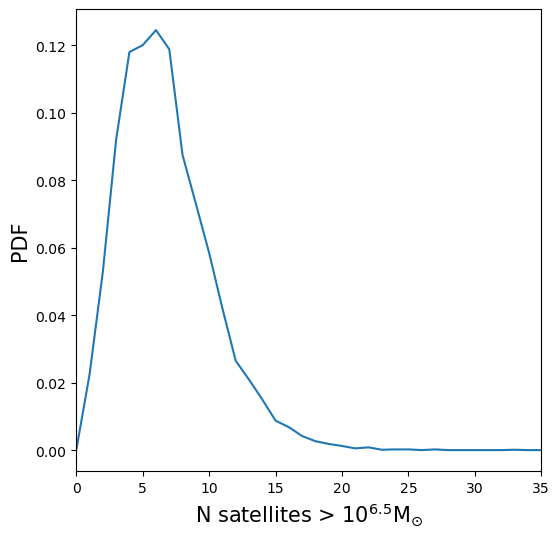

In [74]:
models = jsm_models.LOAD_MODELS("../../../data/remote_pull/inference_tests/nadler_stats/s30_data/mock_2_1/remaining_models.npz")

models.get_stats(theta=[10.5, 2.0, 0.0, 0.0, 0.2, 0.0], min_mass=6.5, max_N=700, Nsigma_samples=1)
models.stat.Pnsat_plot()

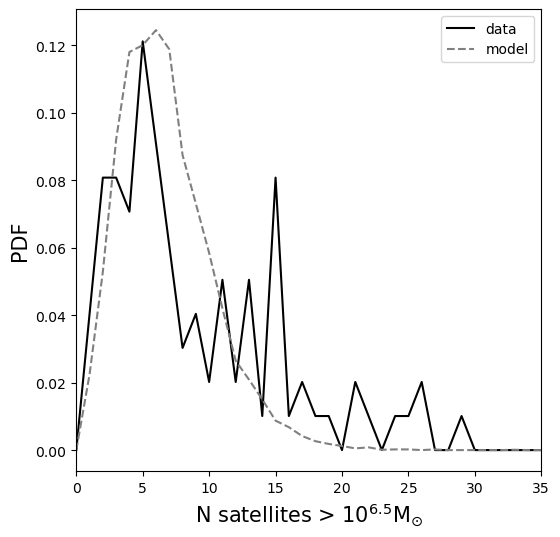

In [75]:
plt.figure(figsize=(6,6))
plt.plot(data.stat.PNsat_range, data.stat.PNsat, color="black", label="data")
plt.plot(models.stat.PNsat_range, models.stat.PNsat, color="grey", ls="--", label="model")
plt.xlabel("N satellites > $10^{"+str(data.stat.min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.legend()
plt.xlim(0,35)
plt.show()

In [65]:
lnL_Pnsat = jsm_stats.lnL_PNsat(data, models)
lnL_KS_max = jsm_stats.lnL_KS_max(data, models)

print(lnL_Pnsat, lnL_KS_max)

-262.1260245946107 -6.301142703533419


## NADLER visualization

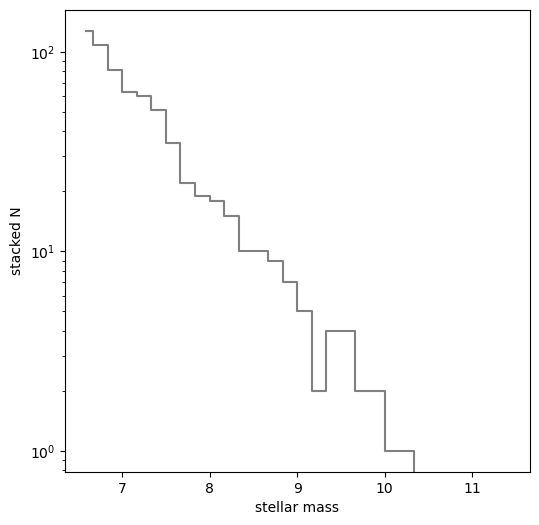

In [67]:
data.get_NADLER_stats(min_mass=6.5, max_mass=11.5, N_bin=31)
data.stat.SMF_plot()

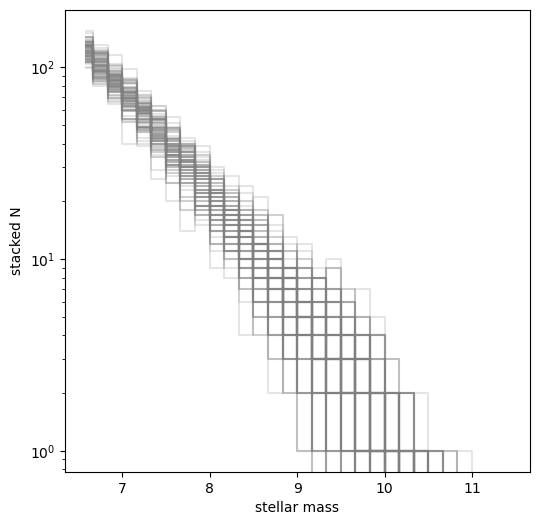

In [68]:
models.get_NADLER_stats(data.fid_theta, min_mass=6.5, max_mass=11.5, N_bin=31)
models.stat.SMF_plot()

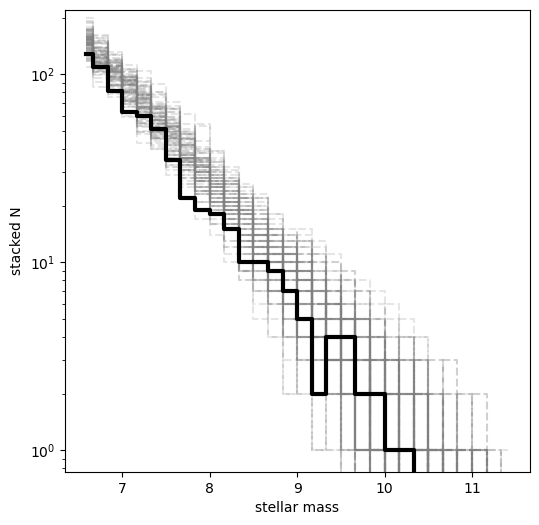

In [48]:
plt.figure(figsize=(6,6))
for stack in models.stat.stack_mat:
    plt.step(models.stat.bin_centers, stack, color="grey", alpha=0.2, ls="--", where="mid")
plt.step(data.stat.bin_centers, data.stat.stack, color="black", where="mid", lw=3)
plt.xlabel("stellar mass")
plt.ylabel("stacked N")
plt.yscale("log")
plt.ylim(0, 220)
plt.show() 

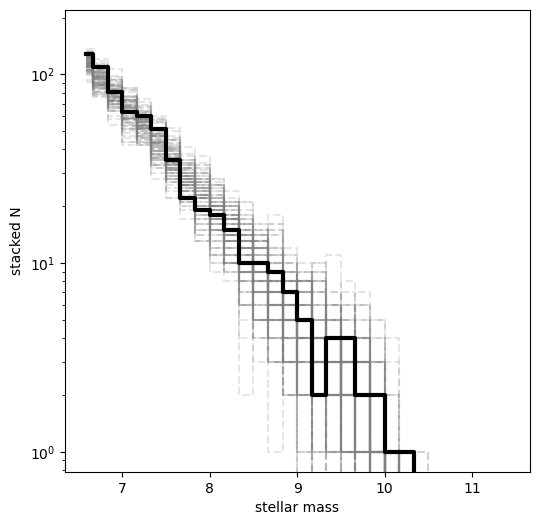

In [57]:
plt.figure(figsize=(6,6))
for stack in models.stat.stack_mat:
    plt.step(models.stat.bin_centers, stack, color="grey", alpha=0.2, ls="--", where="mid")
plt.step(data.stat.bin_centers, data.stat.stack, color="black", where="mid", lw=3)
plt.xlabel("stellar mass")
plt.ylabel("stacked N")
plt.yscale("log")
plt.ylim(0, 220)
plt.show() 

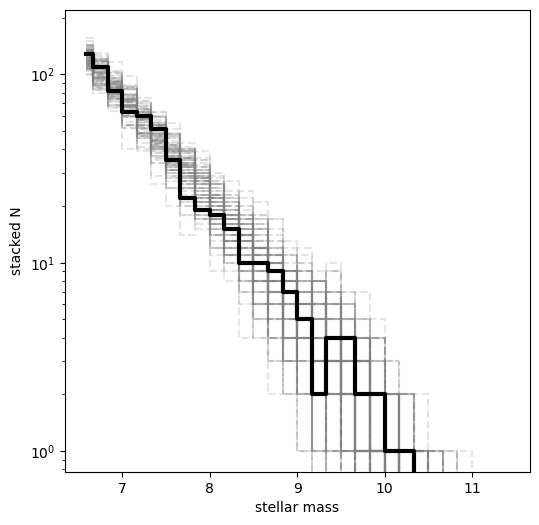

In [69]:
plt.figure(figsize=(6,6))
for stack in models.stat.stack_mat:
    plt.step(models.stat.bin_centers, stack, color="grey", alpha=0.2, ls="--", where="mid")
plt.step(data.stat.bin_centers, data.stat.stack, color="black", where="mid", lw=3)
plt.xlabel("stellar mass")
plt.ylabel("stacked N")
plt.yscale("log")
plt.ylim(0, 220)
plt.show() 

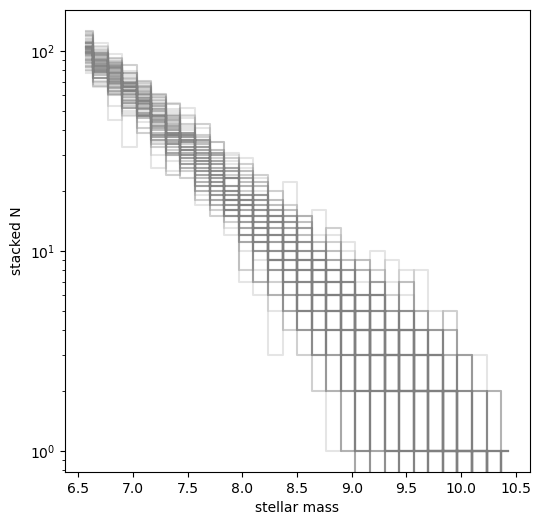

In [77]:
models0 = jsm_models.LOAD_MODELS("../../../data/remote_pull/inference_tests/nadler_stats/s30_data/mock_2_0/remaining_models.npz")
models.get_NADLER_stats(data.fid_theta, min_mass=6.5, max_mass=10.5, N_bin=31)
models.stat.SMF_plot()

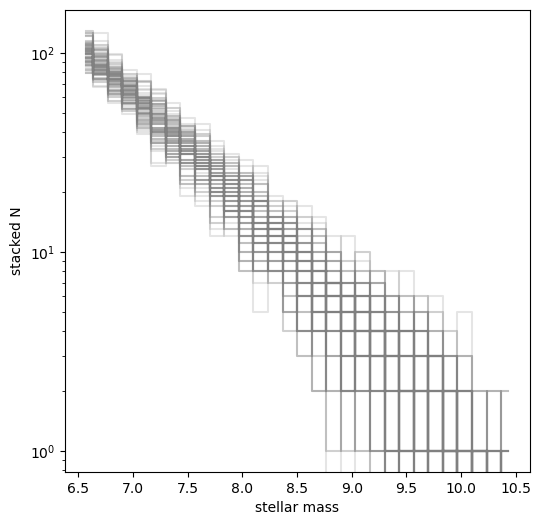

In [78]:
models0 = jsm_models.LOAD_MODELS("../../../data/remote_pull/inference_tests/nadler_stats/s30_data/mock_2_1/remaining_models.npz")
models.get_NADLER_stats(data.fid_theta, min_mass=6.5, max_mass=10.5, N_bin=31)
models.stat.SMF_plot()

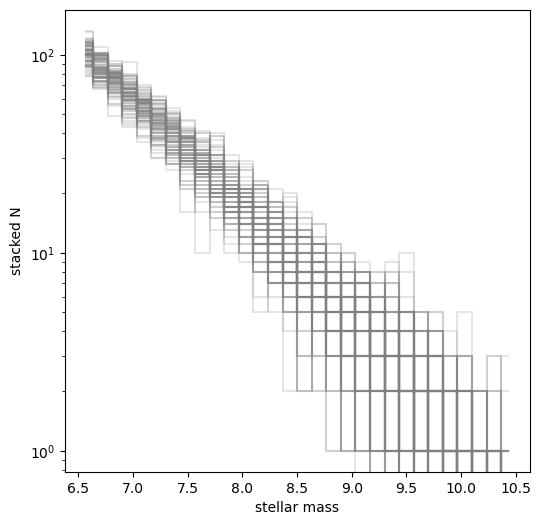

In [80]:
models0 = jsm_models.LOAD_MODELS("../../../data/remote_pull/inference_tests/nadler_stats/s30_data/mock_2_2/remaining_models.npz")
models.get_NADLER_stats(data.fid_theta, min_mass=6.5, max_mass=10.5, N_bin=31)
models.stat.SMF_plot()